In [1]:
pip list

Package                      Version             
---------------------------- --------------------
absl-py                      1.4.0               
asttokens                    2.2.1               
astunparse                   1.6.3               
attrs                        19.3.0              
Automat                      0.8.0               
Babel                        2.6.0               
backcall                     0.2.0               
blinker                      1.4                 
cachetools                   5.3.1               
certifi                      2019.11.28          
chardet                      3.0.4               
Click                        7.0                 
cloud-init                   22.3.4              
colorama                     0.4.3               
comm                         0.1.3               
command-not-found            0.3                 
configobj                    5.0.6               
constantly                   15.1.0              


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Month'>

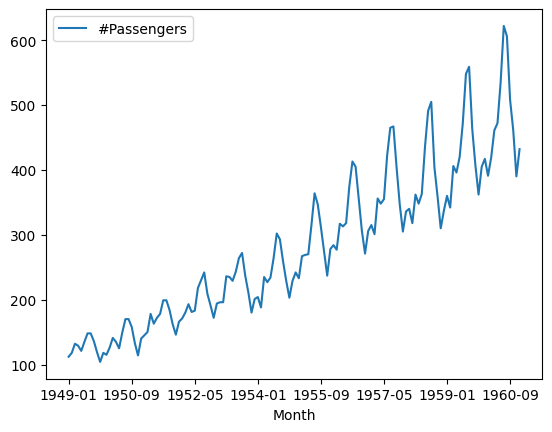

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("AirPassengers.csv")

df.plot(x='Month', y ='#Passengers')

In [4]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

2023-06-14 10:25:38.989531: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 10:25:39.616958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-14 10:25:39.618237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 10:25:41.988414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
training_set = df.iloc[:45, 1:2].values
test_set = df.iloc[45:, 1:2].values

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 45):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [7]:
xtrainbaru = np.reshape(X_train, (40, 5))

In [8]:
xtestbaru = np.reshape(x_test, (19, 5))


NameError: name 'x_test' is not defined

In [9]:
predicted_pass = modelknn.predict(xtestbaru)

predicted_pass = predicted_pass.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pakan)
dataset_test=dataset_test.iloc[0:19]

NameError: name 'modelknn' is not defined

In [10]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)

In [11]:

dataset_test = df.iloc[45:, 1:2]
dataset_train = df.iloc[45:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values

NameError: name 'prediksi' is not defined

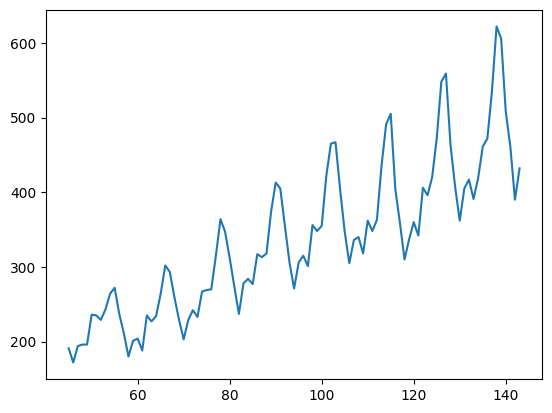

In [12]:
import matplotlib.pyplot as plt
plt.plot(dataset_test,label = 'Data Real')
plt.plot(prediksi,label = 'Data prediksi')
plt.xticks(np.arange(0,19,1))
plt.title('Prediksi penumpang')
plt.xlabel('Mounth')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

NameError: name 'prediksi' is not defined

In [15]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)


ValueError: Unknown label type: (array([0.        , 0.07246377, 0.07971014, 0.10144928, 0.10869565,
       0.15217391, 0.15942029, 0.21014493, 0.22463768, 0.23188406,
       0.26086957, 0.26811594, 0.29710145, 0.30434783, 0.31884058,
       0.32608696, 0.33333333, 0.39130435, 0.42028986, 0.42753623,
       0.44927536, 0.47826087, 0.48550725, 0.49275362, 0.53623188,
       0.55072464, 0.55797101, 0.57246377, 0.57971014, 0.64492754,
       0.6884058 , 0.76086957, 0.82608696, 0.91304348, 1.        ]),)